In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#twitter api req

consumer_key = 'OghYPlGodEcgozxuNVr5c5294'
consumer_secret = 'yHNzTz2WMoFvmMyUYPc5h2xqjn3Rjz1Ryc494gxf5SFwMzFG6F'
access_token = '2408033235-cChNchze46vnUMT97ECabw73MsCWAeUm7vrWslh'
access_token_secret = '3afWisufWn9u9LbMQu6v06XPbUak9DESRGnp3PF4xAZb0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#create api obj
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
#extract all tweets form the twitter user

posts = []
for tweet in tweepy.Cursor(api.user_timeline, screen_name="RichardDawkins", ).items():
    posts.append(tweet)



In [5]:
i = 1
#print tweets
print("Show the tweets:\n")
for tweet in posts:
    print(str(i) + ")" + tweet.text+"\n")
    i += 1

Show the tweets:

1)Forget labels like “right wing” &amp; “dark web”, read a book without preconceptions about the author &amp; judge what it a… https://t.co/oOMUTXNYrF

2)Just read, straight through for the 2nd time, Niko’s Nature, Hans Kruuk’s biography of Niko Tinbergen. Highly intel… https://t.co/aOLTaFvM8f

3)“They think it’s murder.” My take on abortion. Published online today by Free Inquiry: https://t.co/K5u553fiMN

If… https://t.co/zH9g2PaekX

4)In 2012 I was presented with the British Humanist Association Award for Services to Humanism. As a lifelong loyal h… https://t.co/4914nI4mer

5)RT @center4inquiry: Stuart Vyse on Rational Irrationality: Skeptical Inquirer Presents, May 12 https://t.co/b7t1Fa8T3h

6)In Glasgow to present Flights of Fancy at the Aye Write Festival. 6:30 pm today, 7th May. Mitchell Library.

https://t.co/SEBjgWdut8

7)Flights of Fancy now published in North America. Also available as an audiobook.
https://t.co/rHu68ePHLA

8)RT @sapinker: Why don't pigs ha

In [14]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove  @mentions
    text = re.sub(r'#', '', text) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyper link

    return text

df = pd.DataFrame([tweet.text for tweet in posts], columns=['Tweets'])
df['Tweets'] = df['Tweets'].apply(cleanTxt)
#print
df

,Tweets
0,Forget labels like “right wing” &amp; “dark we...
1,"Just read, straight through for the 2nd time, ..."
2,“They think it’s murder.” My take on abortion....
3,In 2012 I was presented with the British Human...
4,: Stuart Vyse on Rational Irrationality: Skept...
...,...
3237,"Well, if you thought Michael Wolff’s book was ..."
3238,“I want to give my life for Islam.” This boy i...
3239,
3240,Finished Michael Wolff’s stunning Fire and Fur...


In [72]:
keywords = ['evo', 'evolution', 'overproduction', 'adaption', 'organism', 'speciation', 'variation', 'metamorphosis', 'habitat', 'ecosystem', 'ancestor', 'taxonomy', 'taconomic', 'cell', 'inheritance', 'root', 'biology', 'Darwin', 'Natural Selection', 'Origin', 'botanic', 'cholorplast', 'classification', 'clone', 'mutation', 'isolation', 'cytoplasm', 'dna', 'ecology', 'embryo', 'eukaryotic', 'rna', 'fauna', 'flora', 'fetus', 'fossil', 'fungi', 'gene', 'genetic', 'genome', 'dinosour','ape']
evoRTweets = []
i = 0

count = 0
for tweet in df['Tweets']:
    if any(keyword in tweet for keyword in keywords):
        evoRTweets.append(tweet)
        count+=1
    i+=1

dfEvo = pd.DataFrame([item for item in evoRTweets], columns=['Tweets'])

dfEvo


,Tweets
0,Forbidden grapefruit because statin interactio...
1,"Excellent article by Thomas Friedman, offering..."
2,The Cheating Cell by . Darwinian approach to e...
3,Sorry it’s behind a paywall. But good journali...
4,Fly around &amp; zoom in on the mind-shatterin...
...,...
234,"God, guns and embryos. Those are their priorit..."
235,Excellent article on military rifles – the kin...
236,Salon de-published this excellent piece Didn’...
237,"In celebration of DarwinDay, please donate to ..."


In [73]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#create two new colums
dfEvo['Subjectivity'] = dfEvo['Tweets'].apply(getSubjectivity)
dfEvo['Polarity'] = dfEvo['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
dfEvo


,Tweets,Subjectivity,Polarity
0,Forbidden grapefruit because statin interactio...,0.400000,-0.050000
1,"Excellent article by Thomas Friedman, offering...",0.800000,0.116667
2,The Cheating Cell by . Darwinian approach to e...,1.000000,0.900000
3,Sorry it’s behind a paywall. But good journali...,0.600000,0.025000
4,Fly around &amp; zoom in on the mind-shatterin...,0.744444,0.322222
...,...,...,...
234,"God, guns and embryos. Those are their priorit...",0.000000,0.000000
235,Excellent article on military rifles – the kin...,0.540000,0.380000
236,Salon de-published this excellent piece Didn’...,1.000000,1.000000
237,"In celebration of DarwinDay, please donate to ...",0.000000,0.000000


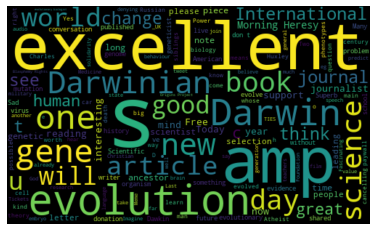

In [64]:
# plot the word cloud

allWords = ' '.join([twts for twts in dfEvo['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [74]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

dfEvo['Analysis'] = dfEvo['Polarity'].apply(getAnalysis)

#show dataframe
dfEvo

,Tweets,Subjectivity,Polarity,Analysis
0,Forbidden grapefruit because statin interactio...,0.400000,-0.050000,Negative
1,"Excellent article by Thomas Friedman, offering...",0.800000,0.116667,Positive
2,The Cheating Cell by . Darwinian approach to e...,1.000000,0.900000,Positive
3,Sorry it’s behind a paywall. But good journali...,0.600000,0.025000,Positive
4,Fly around &amp; zoom in on the mind-shatterin...,0.744444,0.322222,Positive
...,...,...,...,...
234,"God, guns and embryos. Those are their priorit...",0.000000,0.000000,Neutral
235,Excellent article on military rifles – the kin...,0.540000,0.380000,Positive
236,Salon de-published this excellent piece Didn’...,1.000000,1.000000,Positive
237,"In celebration of DarwinDay, please donate to ...",0.000000,0.000000,Neutral


In [75]:
#get the percentage of positive tweets
ptweets = dfEvo[dfEvo.Analysis == 'Positive']
ptweets = ptweets['Tweets']


round((ptweets.shape[0] / dfEvo.shape[0])* 100, 1) 

59.4

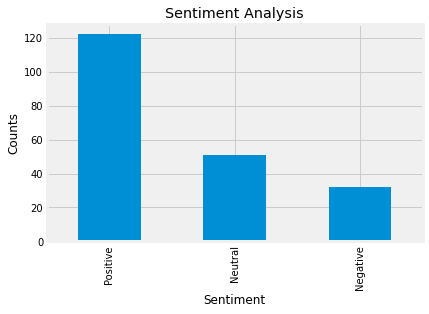

In [71]:
#show the value counts

dfEvo['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfEvo['Analysis'].value_counts().plot(kind='bar')
plt.show()